In [1]:
import sys,time
sys.path.append('../')
from smodels.theory.tree import Tree, InclusiveParticleNode
from smodels.theory.auxiliaryFunctions import bracketToProcessStr
from smodels.experiment.defaultFinalStates import finalStates
from smodels.particlesLoader import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.theory.model import Model
from smodels.tools.physicsUnits import fb, GeV
from smodels.theory.element import Element
import networkx as nx

### Convert (old) bracket notation with InclusiveBranch

In [2]:
stringEl = "[ [ ['L','nu'] ], ['*'] ]"
output = bracketToProcessStr(stringEl)
print(output)

(PV > anyBSM(1),InclusiveNode(2)),(anyBSM(1) > L,nu,MET),(InclusiveNode(2) > anySM,MET)


In [3]:
stringEl = "[ [['*'],['e+']], [ ['L','nu'] ] ]"
output2 = bracketToProcessStr(stringEl)
print(output2)

(PV > anyBSM(1),anyBSM(3)),(anyBSM(1) > anySM,anyBSM(2)),(anyBSM(2) > e+,MET),(anyBSM(3) > L,nu,MET)


In [4]:
stringEl = "[ ['*'], [ ['L','nu'] ] ]"
output = bracketToProcessStr(stringEl)
print(output)

(PV > InclusiveNode(1),anyBSM(2)),(InclusiveNode(1) > anySM,MET),(anyBSM(2) > L,nu,MET)


### Convert process string to graph

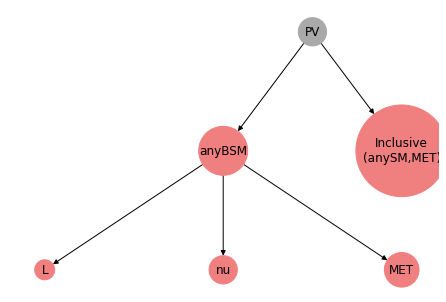

[PV, anyBSM, Inclusive, L, nu, MET]
[(PV, anyBSM), (PV, Inclusive), (anyBSM, L), (anyBSM, nu), (anyBSM, MET)]


In [5]:
stringEl = "[ [ ['L','nu'] ], ['*'] ]"
T = Tree(stringEl)
T.draw()
print(T.nodes)
print(T.edges)

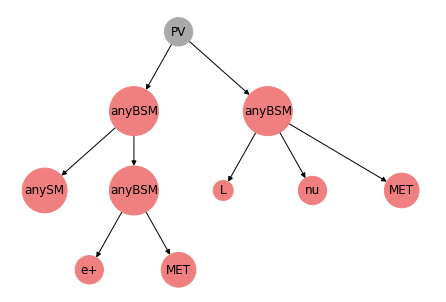

[PV, anyBSM, anyBSM, anySM, anyBSM, e+, MET, L, nu, MET]
[(PV, anyBSM), (PV, anyBSM), (anyBSM, anySM), (anyBSM, anyBSM), (anyBSM, L), (anyBSM, nu), (anyBSM, MET), (anyBSM, e+), (anyBSM, MET)]


In [6]:
procString = output2
T = Tree(procString)
T.draw()
print(T.nodes)
print(T.edges)

### Create using final states model (database particles)

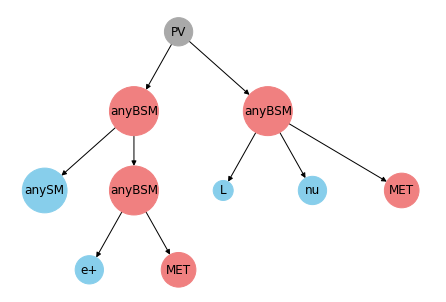

[PV, anyBSM, anyBSM, anySM, anyBSM, e+, MET, L, nu, MET]
[(PV, anyBSM), (PV, anyBSM), (anyBSM, anySM), (anyBSM, anyBSM), (anyBSM, L), (anyBSM, nu), (anyBSM, MET), (anyBSM, e+), (anyBSM, MET)]


In [7]:
stringEl = "[ [['*'],['e+']], [ ['L','nu'] ] ]"
T = Tree(stringEl,model=finalStates)
T.draw()
print(T.nodes)
print(T.edges)

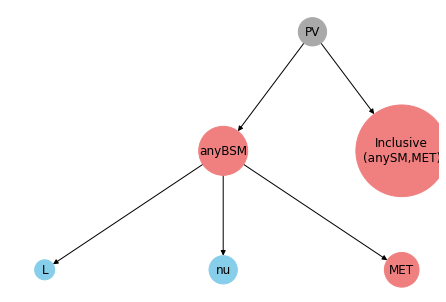

[PV, anyBSM, Inclusive, L, nu, MET]
[(PV, anyBSM), (PV, Inclusive), (anyBSM, L), (anyBSM, nu), (anyBSM, MET)]


In [8]:
stringEl = "[ [ ['L','nu'] ], ['*'] ]"
T = Tree(stringEl,model=finalStates)
T.draw()
print(T.nodes)
print(T.edges)

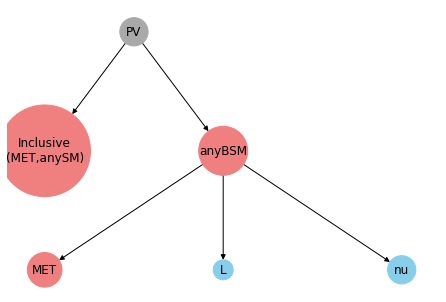

[PV, Inclusive, anyBSM, MET, L, nu]
[(PV, Inclusive), (PV, anyBSM), (anyBSM, MET), (anyBSM, L), (anyBSM, nu)]


In [9]:
T.sort()
T.draw()
print(T.nodes)
print(T.edges)

In [10]:
for n in T.nodes:
    print(n,n.canonName)

PV *
Inclusive *
anyBSM 11010100
MET 10
L 10
nu 10


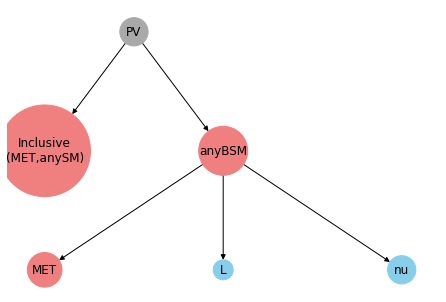

[PV, Inclusive, anyBSM, MET, L, nu]
[(PV, Inclusive), (PV, anyBSM), (anyBSM, MET), (anyBSM, L), (anyBSM, nu)]


In [11]:
stringEl = "[ ['*'], [ ['L','nu'] ] ]"
output = bracketToProcessStr(stringEl)
procString = output
T = Tree(procString,model=finalStates)
T.sort()
T.draw()
print(T.nodes)
print(T.edges)

### Element comparison

In [12]:
slhafile="../inputFiles/slha/lightEWinos.slha"
model = Model(BSMList,SMList)
model.updateParticles(inputFile=slhafile,promptWidth = 1e-12*GeV)

In [13]:
elA = Element("[ [ ['e-','nu'] ], [['ta+','ta-'],['u,u~']] ]",model=model,
              intermediateState=[['C1-'],['N2','gluino']], finalState=['N1','N1'])
elB = Element("[ ['*'], [ ['L','nu'] ] ]",model=finalStates)
elC = Element("[ [ ['e-','q'] ], [['e+','ta-']] ]",model=model,
              intermediateState=[['C1-'],['N2','gluino']], finalState=['N1','C2+'])

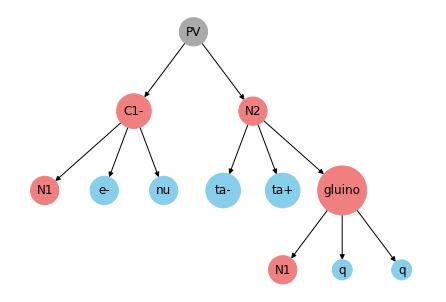

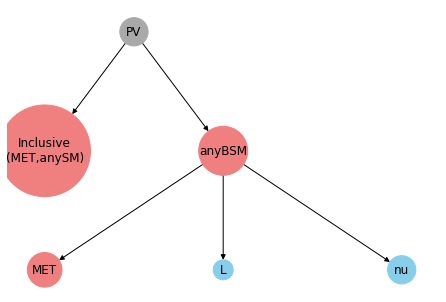

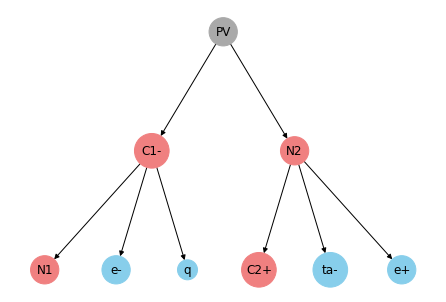

In [14]:
elA.drawTree()
elB.drawTree()
elC.drawTree()

In [15]:
elA == elB,elC == elB

(True, False)

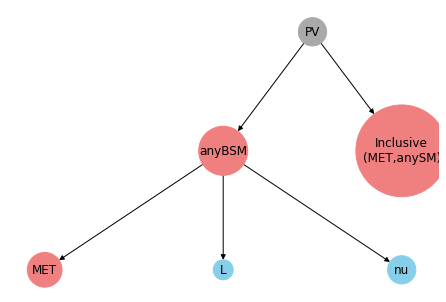

[PV, anyBSM, Inclusive, MET, L, nu]
[(PV, anyBSM), (PV, Inclusive), (anyBSM, MET), (anyBSM, L), (anyBSM, nu)]


In [16]:
matchedEl = elA.compareTo(elB)[1]
matchedEl.drawTree()
print(matchedEl.tree.nodes)
print(matchedEl.tree.edges)

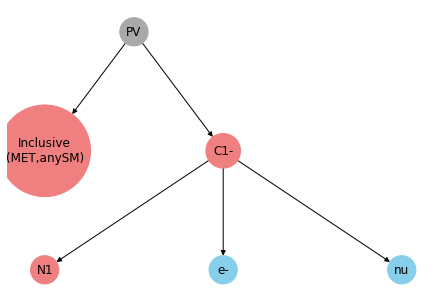

[PV, Inclusive, C1-, N1, e-, nu]
[(PV, Inclusive), (PV, C1-), (C1-, N1), (C1-, e-), (C1-, nu)]


In [17]:
matchedEl = elB.compareTo(elA)[1]
matchedEl.drawTree()
print(matchedEl.tree.nodes)
print(matchedEl.tree.edges)

In [18]:
print(matchedEl.mass)

[None, None, 1.34E+02 [GeV], 6.81E+01 [GeV], 5.00E-01 [MeV], 0.00E+00 [MeV]]


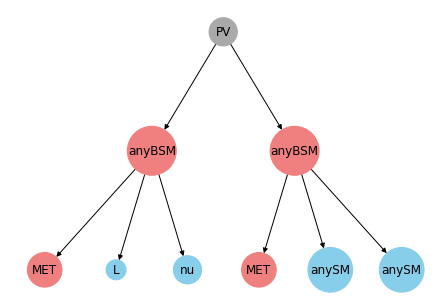

[PV, anyBSM, anyBSM, MET, L, nu, MET, anySM, anySM]
[(PV, anyBSM), (PV, anyBSM), (anyBSM, MET), (anyBSM, L), (anyBSM, nu), (anyBSM, MET), (anyBSM, anySM), (anyBSM, anySM)]


In [19]:
stringEl = "[ [['*','*']], [ ['L','nu'] ] ]"
elA = Element(stringEl,model=finalStates)
elA.drawTree()
print(elA.tree.nodes)
print(elA.tree.edges)

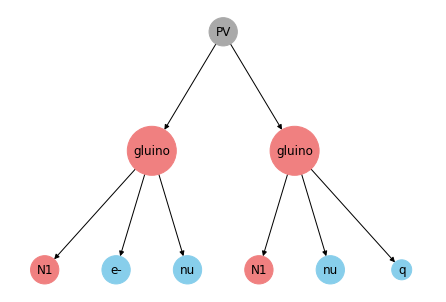

[PV, gluino, gluino, N1, e-, nu, N1, nu, q]
[(PV, gluino), (PV, gluino), (gluino, N1), (gluino, e-), (gluino, nu), (gluino, N1), (gluino, nu), (gluino, q)]


In [20]:
stringEl = "[ [['u','nu']], [ ['e-','nu'] ] ]"
elB = Element(stringEl,model=model,finalState=['N1','N1'],intermediateState=[['gluino'],['gluino']])
elB.drawTree()
print(elB.tree.nodes)
print(elB.tree.edges)

In [21]:
elA == elB

True

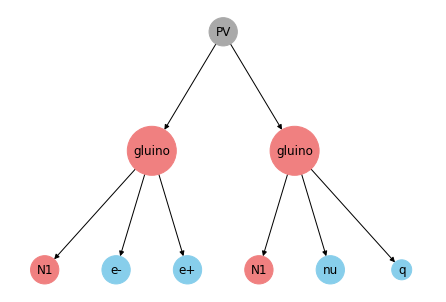

[PV, gluino, gluino, N1, e-, e+, N1, nu, q]
[(PV, gluino), (PV, gluino), (gluino, N1), (gluino, e-), (gluino, e+), (gluino, N1), (gluino, nu), (gluino, q)]


In [22]:
stringEl = "[ [['u','nu']], [ ['e-','e+'] ] ]"
elC = Element(stringEl,model=model,finalState=['N1','N1'],intermediateState=[['gluino'],['gluino']])
elC.drawTree()
print(elC.tree.nodes)
print(elC.tree.edges)

In [23]:
elA == elC

False